The first step is to install the pycaret library. Shown below is the code for default installation. This will not include all the optional dependencies, to install them, use pip install pycaret[full]

In [1]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.


# PyCaret Classification Quick Start Workflow

This section outlines the minimum steps required to go from raw data to a fully trained machine learning model using the PyCaret Functional API. This demonstrates your Quick Start Capability.

### 1. Importing Libraries and Loading Data

The first step in any PyCaret analysis is **importing the necessary functions** and loading the data using `get_data()`.

### 2. Setting Up the Experiment

Next, we define our experiment using the `setup()` function. This is the most crucial step, as it handles all of the automatic **preprocessing, data cleaning, and data splitting**. We must specify the `target` column.

### 3. Experimentation and Model Comparison

The most powerful function in Classification is `compare_models()`, which trains and evaluates a leaderboard of algorithms in a single line.

### 4. Finalization and Saving

Finally, the best model can be saved using the `save_model` function. This saves the **complete pipeline** (preprocessing steps + model), fulfilling the **MLOps readiness** requirement.

## Classification Module

In [10]:
# --- Imports for Functional and OOP API Access ---
from pycaret.datasets import get_data
from pycaret.classification import (
    setup,
    compare_models,
    predict_model,
    plot_model,
    save_model
)
from pycaret.classification import ClassificationExperiment # Required for OOP

print("--- Structured Classification Workflow ---")

--- Structured Classification Workflow ---


In [12]:
# 1. LOAD DATASET
data = get_data('bank')
print("\n[STEP 1] Data Loaded (Bank Marketing Data).")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no



[STEP 1] Data Loaded (Bank Marketing Data).


In [14]:
# 2. FUNCTIONAL API DEMO (Quick Check)
print("\n[STEP 2] Functional API Demo: Running Setup for Quick Check...")
# The functional API is fine for a quick benchmark/check
# *** FIXED TARGET: 'deposit' ***
s_functional = setup(
    data=data,
    target='deposit',
    session_id=7502,
    normalize=True,
    verbose=False # Set to False to prevent clash with OOP's setup output
)
print("[STEP 2] Functional Setup Complete. Now Switching to OOP API for Full Workflow.")



[STEP 2] Functional API Demo: Running Setup for Quick Check...
[STEP 2] Functional Setup Complete. Now Switching to OOP API for Full Workflow.


In [16]:
# 3. OOP API (SETUP - For the Main Workflow)
# Initialize the OOP Experiment object. This is a clean slate.
exp = ClassificationExperiment()
print("\n[STEP 3] Initializing OOP API Setup (Full Workflow)...")

# We run setup again on the OOP object for the main analysis flow.
exp.setup(
    data=data,
    target='deposit',
    session_id=7502,
    normalize=True,
    verbose=True # Set to True to display the main Setup Grid
)



[STEP 3] Initializing OOP API Setup (Full Workflow)...


,Description,Value
0,Session id,7502
1,Target,deposit
2,Target type,Binary
3,Target mapping,"no: 0, yes: 1"
4,Original data shape,"(45211, 17)"
5,Transformed data shape,"(45211, 49)"
6,Transformed train set shape,"(31647, 49)"
7,Transformed test set shape,"(13564, 49)"
8,Numeric features,7
9,Categorical features,9


In [18]:
# 4. COMPARE MODELS
print("\n[STEP 4] Comparing Models (Benchmarking all algorithms)...")
# We use the OOP method: exp.compare_models()
best_model = exp.compare_models(verbose=True)
print(f"\nModel Comparison Complete. Best Model: {type(best_model).__name__}")


[STEP 4] Comparing Models (Benchmarking all algorithms)...


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9086,0.9342,0.9086,0.9004,0.9030,0.5051,0.5115,0.3880
rf,Random Forest Classifier,0.9055,0.9261,0.9055,0.8930,0.8938,0.4372,0.4590,0.6970
gbc,Gradient Boosting Classifier,0.9047,0.9230,0.9047,0.8924,0.8944,0.4453,0.4619,0.9470
et,Extra Trees Classifier,0.9004,0.9068,0.9004,0.8852,0.8864,0.3931,0.4178,0.7670
lr,Logistic Regression,0.9002,0.9044,0.9002,0.8849,0.8863,0.3927,0.4169,0.8580
lda,Linear Discriminant Analysis,0.9002,0.9049,0.9002,0.8899,0.8933,0.4529,0.4599,0.1910
ridge,Ridge Classifier,0.8991,0.9049,0.8991,0.8824,0.8802,0.3459,0.3860,0.1460
ada,Ada Boost Classifier,0.8991,0.9064,0.8991,0.8847,0.8876,0.4072,0.4242,0.4280
svm,SVM - Linear Kernel,0.8961,0.8708,0.8961,0.8810,0.8831,0.3807,0.4013,0.2120
knn,K Neighbors Classifier,0.8929,0.7979,0.8929,0.8746,0.8780,0.3485,0.3700,0.8500



Model Comparison Complete. Best Model: LGBMClassifier


In [20]:
# 5. ANALYSE MODEL (Diagnostics)
print("\n[STEP 5] Analyzing Model (Plotting AUC and Confusion Matrix)...")
# Analyze AUC curve using OOP method
exp.plot_model(best_model, plot='auc', save=True)
print("AUC Plot saved to project directory.")


[STEP 5] Analyzing Model (Plotting AUC and Confusion Matrix)...


AUC Plot saved to project directory.


In [22]:
# Analyze Confusion Matrix using OOP method
exp.plot_model(best_model, plot='confusion_matrix', save=True)
print("Confusion Matrix saved to project directory.")

Confusion Matrix saved to project directory.


In [24]:
# 6. PREDICTIONS
print("\n[STEP 6] Generating Predictions on Held-Out Test Set...")
# Predict on the held-out test set using OOP method
predictions = exp.predict_model(best_model)
print("\nPredictions on held-out set (first 5 rows):")
# Note: The original 'deposit' column is compared against the new 'prediction_label'
print(predictions[['deposit', 'prediction_label']].head())


[STEP 6] Generating Predictions on Held-Out Test Set...


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9098,0.9384,0.9098,0.9018,0.9044,0.5130,0.5189



Predictions on held-out set (first 5 rows):
      deposit prediction_label
21939      no               no
40852      no              yes
8040       no               no
11699      no               no
9769       no               no


In [26]:
# 7. SAVE MODEL
print("\n[STEP 7] Saving Pipeline (MLOps Readiness)...")
# Save the final model and the entire preprocessing pipeline using OOP method
exp.save_model(best_model, 'pycaret_bank_final_pipeline')
print("\nModel saved successfully as 'pycaret_bank_final_pipeline.pkl'.")


[STEP 7] Saving Pipeline (MLOps Readiness)...
Transformation Pipeline and Model Successfully Saved

Model saved successfully as 'pycaret_bank_final_pipeline.pkl'.


## Regresssion Module

In [34]:
# --- Imports for Functional and OOP API Access ---
from pycaret.datasets import get_data
from pycaret.regression import(
    setup,
    compare_models,
    predict_model,
    plot_model,
    save_model
)
from pycaret.regression import RegressionExperiment

print("--- Structured REGRESSION Workflow ---")

--- Structured REGRESSION Workflow ---


In [36]:
# 1. LOAD DATASET
# Load the diamond dataset for Regression (predicting continuous Price)
data = get_data('diamond')
print("\n[STEP 1] Data Loaded (Diamond Price Data).")

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171



[STEP 1] Data Loaded (Diamond Price Data).


In [38]:
# 2. FUNCTIONAL API DEMO (Quick Check)
print("\n[STEP 2] Functional API Demo: Running Setup for Quick Check...")
# The functional API is fine for a quick benchmark/check
s_functional = setup(
    data=data,
    target='Price',
    session_id=7502,
    normalize=True,
    verbose=False # Set to False to prevent clash with OOP's setup output
)
print("[STEP 2] Functional Setup Complete. Now Switching to OOP API for Full Workflow.")



[STEP 2] Functional API Demo: Running Setup for Quick Check...
[STEP 2] Functional Setup Complete. Now Switching to OOP API for Full Workflow.


In [40]:
# 3. OOP API (SETUP - For the Main Workflow)
# Initialize the OOP Experiment object. This is a clean slate.
exp = RegressionExperiment() # NOTE: Initializing RegressionExperiment
print("\n[STEP 3] Initializing OOP API Setup (Full Workflow)...")

# We run setup again on the OOP object for the main analysis flow.
exp.setup(
    data=data,
    target='Price',
    session_id=7502,
    normalize=True,
    verbose=True # Set to True to display the main Setup Grid
)


[STEP 3] Initializing OOP API Setup (Full Workflow)...


,Description,Value
0,Session id,7502
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


In [42]:
# 4. COMPARE MODELS
print("\n[STEP 4] Comparing Models (Benchmarking all algorithms)...")
# We use the OOP method: exp.compare_models(). Metrics will now be R2, MAE, RMSE, etc.
best_model = exp.compare_models(verbose=True)
print(f"\nModel Comparison Complete. Best Model: {type(best_model).__name__}")



[STEP 4] Comparing Models (Benchmarking all algorithms)...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,752.5211,2323251.5306,1504.5846,0.9773,0.0808,0.0602,0.2450
rf,Random Forest Regressor,739.3780,2622728.7921,1587.7333,0.9744,0.0791,0.0583,0.2350
lightgbm,Light Gradient Boosting Machine,730.5755,2796401.6305,1631.4912,0.9729,0.0752,0.0556,0.1460
gbr,Gradient Boosting Regressor,886.1041,2998925.1656,1715.3560,0.9705,0.1003,0.0757,0.0820
dt,Decision Tree Regressor,957.2868,4476289.7858,2074.0758,0.9553,0.1043,0.0757,0.0360
lasso,Lasso Regression,2405.1902,14435326.3663,3756.2057,0.8605,0.6055,0.2842,0.4820
ridge,Ridge Regression,2405.6747,14435503.7708,3756.2230,0.8605,0.6075,0.2843,0.0350
llar,Lasso Least Angle Regression,2405.2038,14435320.6813,3756.2049,0.8605,0.6057,0.2842,0.0330
br,Bayesian Ridge,2403.9545,14435029.7799,3756.0099,0.8605,0.6092,0.2839,0.0410
lr,Linear Regression,2423.5914,14576050.1737,3773.6555,0.8592,0.6114,0.2884,0.6600



Model Comparison Complete. Best Model: ExtraTreesRegressor


In [44]:
# 5. ANALYSE MODEL (Diagnostics)
print("\n[STEP 5] Analyzing Model (Plotting Residuals and Prediction Error)...")
# Analyze Residuals Plot (Crucial for Regression)
exp.plot_model(best_model, plot='residuals', save=True)
print("Residuals Plot saved to project directory.")

# Analyze Prediction Error Plot
exp.plot_model(best_model, plot='error', save=True)
print("Prediction Error Plot saved to project directory.")


[STEP 5] Analyzing Model (Plotting Residuals and Prediction Error)...


Residuals Plot saved to project directory.


Prediction Error Plot saved to project directory.


In [46]:
# 6. PREDICTIONS
print("\n[STEP 6] Generating Predictions on Held-Out Test Set...")
# Predict on the held-out test set using OOP method
predictions = exp.predict_model(best_model)
print("\nPredictions on held-out set (first 5 rows):")
# NOTE: Comparing actual 'Price' against the predicted 'prediction_label'
print(predictions[['Price', 'prediction_label']].head())


[STEP 6] Generating Predictions on Held-Out Test Set...


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,737.9485,2603005.6324,1613.3833,0.9760,0.0786,0.0579



Predictions on held-out set (first 5 rows):
      Price  prediction_label
1293   4186           4212.00
5035   5757           5795.00
5021   5718           5754.00
3879   5112           4447.51
3530   3085           3061.81


In [48]:
# 7. SAVE MODEL
print("\n[STEP 7] Saving Pipeline (MLOps Readiness)...")
# Save the final model and the entire preprocessing pipeline using OOP method
exp.save_model(best_model, 'pycaret_diamond_final_pipeline')
print("\nModel saved successfully as 'pycaret_diamond_final_pipeline.pkl'.")


[STEP 7] Saving Pipeline (MLOps Readiness)...
Transformation Pipeline and Model Successfully Saved

Model saved successfully as 'pycaret_diamond_final_pipeline.pkl'.


## Time Series (Forcasting)

In [51]:
# Imports
from pycaret.datasets import get_data
from pycaret.time_series import (
    TSForecastingExperiment,
    setup,
    compare_models,
    plot_model,
    finalize_model,
    predict_model,
    save_model
)

In [53]:
# [STEP 1] Loading the 'airline' dataset
print("[STEP 1] Loading the 'airline' dataset...")
data = get_data('airline')

target_column = 'Number of airline passengers' # Corrected column name for this environment
forecast_horizon = 12 # Predict the next 12 months (one year)


[STEP 1] Loading the 'airline' dataset...


Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

In [55]:
# [STEP 2] Initializing Functional API Setup...
s_functional = setup(
    data,
    target=target_column,
    fh=forecast_horizon,
    session_id=7502,
    verbose=True # Ensures setup grid is displayed
)

,Description,Value
0,session_id,7502
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [57]:
# [STEP 3] Initializing OOP API Setup...
# The OOP API is preferred for stability and structured coding
exp = TSForecastingExperiment()
exp.setup(
    data,
    target=target_column,
    fh=forecast_horizon,
    session_id=7502,
    verbose=True # Ensures setup grid is displayed
)


,Description,Value
0,session_id,7502
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [59]:
# [STEP 4] Compare Models (OOP API)
print("\n[STEP 4] Comparing Models to find the best performing algorithm...")
best_model = exp.compare_models(n_select=1)

print(f"\nBest Model Selected: {type(best_model).__name__}")



[STEP 4] Comparing Models to find the best performing algorithm...


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.5716,0.5997,16.7774,19.7960,0.0422,0.0427,0.8954,0.0733
ets,ETS,0.5865,0.6156,17.2147,20.3200,0.0434,0.0439,0.8901,0.0967
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6751,0.7354,19.9040,24.3274,0.0497,0.0496,0.8430,0.3267
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.6813,0.7866,20.0334,25.9670,0.0491,0.0499,0.8113,0.1667
arima,ARIMA,0.6830,0.6735,20.0069,22.2199,0.0501,0.0507,0.8677,0.0833
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.7004,0.7702,20.6084,25.4401,0.0509,0.0514,0.8215,0.2000
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.7004,0.7703,20.6086,25.4405,0.0509,0.0514,0.8215,0.2167
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.7029,0.7732,20.6816,25.5362,0.0511,0.0516,0.8201,0.2067
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.7048,0.7751,20.7373,25.6005,0.0512,0.0517,0.8193,0.2100
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.7048,0.7751,20.7366,25.6009,0.0512,0.0517,0.8192,0.1867



Best Model Selected: ExponentialSmoothing



[STEP 5] Analyzing Model: Plotting 12-step forecast...


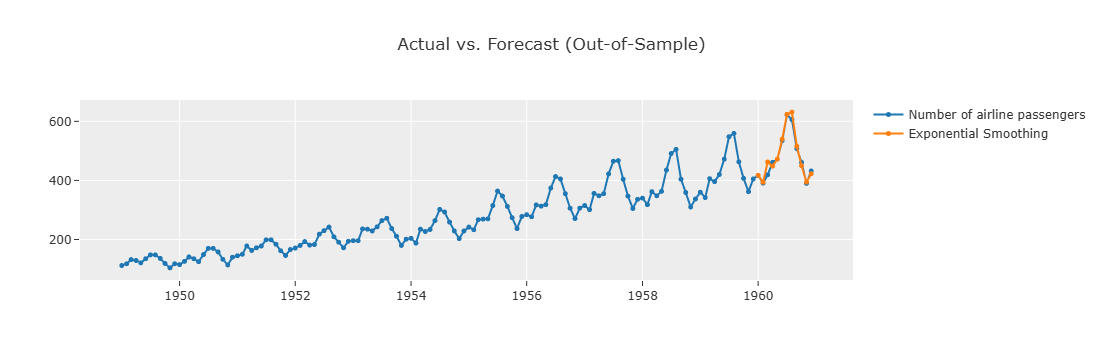

In [61]:
# [STEP 5] Analyze Model (Plot Forecast)
print("\n[STEP 5] Analyzing Model: Plotting 12-step forecast...")
# This plot will show the historical trend and the predicted future values
exp.plot_model(best_model, plot='forecast')

In [63]:
# [STEP 6] Predictions (Forecast)
print("\n[STEP 6] Making Predictions on the forecast horizon (12 steps)...")
predictions = exp.predict_model(best_model)
print("Forecasted Values (first 5):")
print(predictions.head())


[STEP 6] Making Predictions on the forecast horizon (12 steps)...


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Exponential Smoothing,0.3384,0.4576,10.3031,15.8104,0.0221,0.0216,0.9549


Forecasted Values (first 5):
           y_pred
1960-01  417.2853
1960-02  394.0617
1960-03  462.4440
1960-04  448.5977
1960-05  471.8700


In [65]:
# [STEP 7] Finalize and Save Model (MLOps Readiness)
print("\n[STEP 7] Finalizing model and saving pipeline...")
# Finalize trains the best model on the entire dataset
final_pipeline = exp.finalize_model(best_model)
exp.save_model(final_pipeline, 'time_series_airline_pipeline')

print("\nPipeline saved successfully!")


[STEP 7] Finalizing model and saving pipeline...
Transformation Pipeline and Model Successfully Saved

Pipeline saved successfully!


## Clustering Module

In [72]:
# Imports
from pycaret.datasets import get_data
from pycaret.clustering import (
    ClusteringExperiment,
    setup,
    create_model,
    assign_model,
    plot_model,
    save_model
)

print("--- Structured CLUSTERING Workflow ---")

--- Structured CLUSTERING Workflow ---


In [74]:
# [STEP 1] Loading the 'jewellery' dataset
print("[STEP 1] Loading the 'jewellery' dataset...")
data = get_data('jewellery')

[STEP 1] Loading the 'jewellery' dataset...


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [76]:
# [STEP 2] Initializing Functional API Setup...
# For clustering, no target variable is defined.
s_functional = setup(
    data,
    session_id=7502,
    verbose=True # Ensures setup grid is displayed
)


,Description,Value
0,Session id,7502
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [78]:
# [STEP 3] Initializing OOP API Setup...
exp = ClusteringExperiment()
exp.setup(
    data,
    session_id=7502,
    verbose=True # Ensures setup grid is displayed
)


,Description,Value
0,Session id,7502
1,Original data shape,"(505, 4)"
2,Transformed data shape,"(505, 4)"
3,Numeric features,4
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [80]:
# [STEP 4] Create Model (OOP API)
print("\n[STEP 4] Creating K-Means Model for customer segmentation...")
# We choose K-Means and request 4 clusters (segments)
k_means = exp.create_model('kmeans', num_clusters=4)

print(f"\nModel Selected: {type(k_means).__name__}")



[STEP 4] Creating K-Means Model for customer segmentation...


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7217,5009.6748,0.4082,0,0,0



Model Selected: KMeans



[STEP 5] Analyzing Model: Plotting t-SNE projection of clusters...


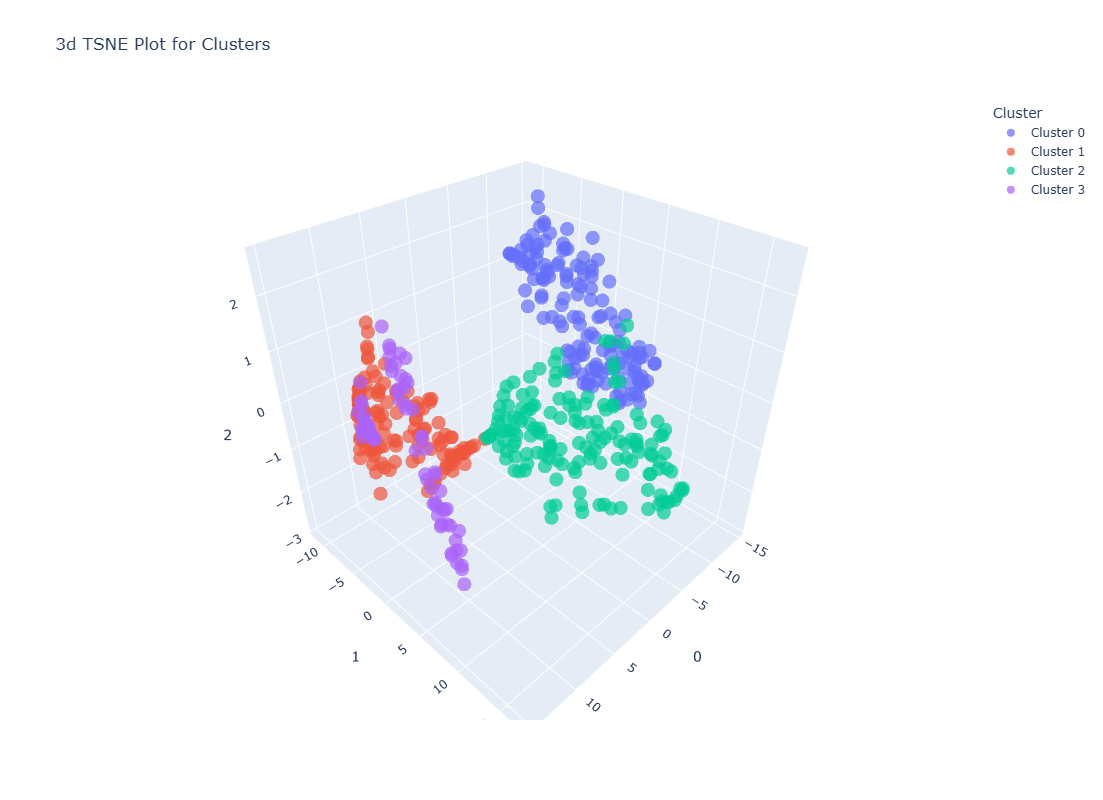

In [82]:
# [STEP 5] Analyze Model (Plot Diagnostics)
print("\n[STEP 5] Analyzing Model: Plotting t-SNE projection of clusters...")
# t-SNE is a common plot to visualize high-dimensional clusters
exp.plot_model(k_means, plot='tsne')


In [84]:
# [STEP 6] Assign Cluster Labels
print("\n[STEP 6] Assigning Cluster Labels back to the original data...")
# Adds a new column ('Cluster') to the data, identifying the segment for each row
data_with_clusters = exp.assign_model(k_means)
print("Data with Clusters (first 5 rows):")
print(data_with_clusters.head())



[STEP 6] Assigning Cluster Labels back to the original data...
Data with Clusters (first 5 rows):
   Age  Income  SpendingScore       Savings    Cluster
0   58   77769       0.791329   6559.830078  Cluster 2
1   59   81799       0.791082   5417.661621  Cluster 2
2   62   74751       0.702657   9258.993164  Cluster 2
3   59   74373       0.765680   7346.334473  Cluster 2
4   87   17760       0.348778  16869.507812  Cluster 0


In [86]:
# [STEP 7] Save Model (MLOps Readiness)
print("\n[STEP 7] Saving clustering model and preprocessing pipeline...")
# Saves the final model and the entire preprocessing pipeline for consistent segmenting of new data
exp.save_model(k_means, 'clustering_jewellery_pipeline')

print("\nPipeline saved successfully!")


[STEP 7] Saving clustering model and preprocessing pipeline...
Transformation Pipeline and Model Successfully Saved

Pipeline saved successfully!


## Anamoly Detection

In [89]:
# Imports
from pycaret.datasets import get_data
from pycaret.anomaly import (
    AnomalyExperiment,
    setup,
    create_model,
    assign_model,
    plot_model,
    save_model
)

print("--- ANOMALY DETECTION Workflow ---")

--- ANOMALY DETECTION Workflow ---


In [91]:
# [STEP 1] Loading the 'kiva' dataset
print("[STEP 1] Loading the 'kiva' dataset...")
# Kiva data is often used for detecting unusual/fraudulent loan requests
data = get_data('kiva')

[STEP 1] Loading the 'kiva' dataset...


,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


In [93]:
# [STEP 2] Initializing Functional API Setup...
# For Anomaly Detection, no target variable is defined.
print("[STEP 2] Initializing Functional API Setup for Anomaly Detection...")
s_functional = setup(
    data,
    session_id=7502,
    verbose=True # Ensures setup grid is displayed
)


[STEP 2] Initializing Functional API Setup for Anomaly Detection...


,Description,Value
0,Session id,7502
1,Original data shape,"(6818, 7)"
2,Transformed data shape,"(6818, 6835)"
3,Numeric features,2
4,Categorical features,5
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [95]:
# [STEP 3] Initializing OOP API Setup...
exp = AnomalyExperiment()
exp.setup(
    data,
    session_id=7502,
    verbose=True # Ensures setup grid is displayed
)

,Description,Value
0,Session id,7502
1,Original data shape,"(6818, 7)"
2,Transformed data shape,"(6818, 6835)"
3,Numeric features,2
4,Categorical features,5
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


In [97]:
# [STEP 4] Create Model (OOP API)
print("\n[STEP 4] Creating Isolation Forest Model (iforest) for anomaly detection...")
# Isolation Forest is a robust, common model for outlier detection
iforest = exp.create_model('iforest', fraction=0.05) # fraction=0.05 tells it to look for 5% anomalies

print(f"\nModel Selected: {type(iforest).__name__}")



[STEP 4] Creating Isolation Forest Model (iforest) for anomaly detection...



Model Selected: IForest



[STEP 5] Analyzing Model: Plotting t-SNE projection of anomalies...


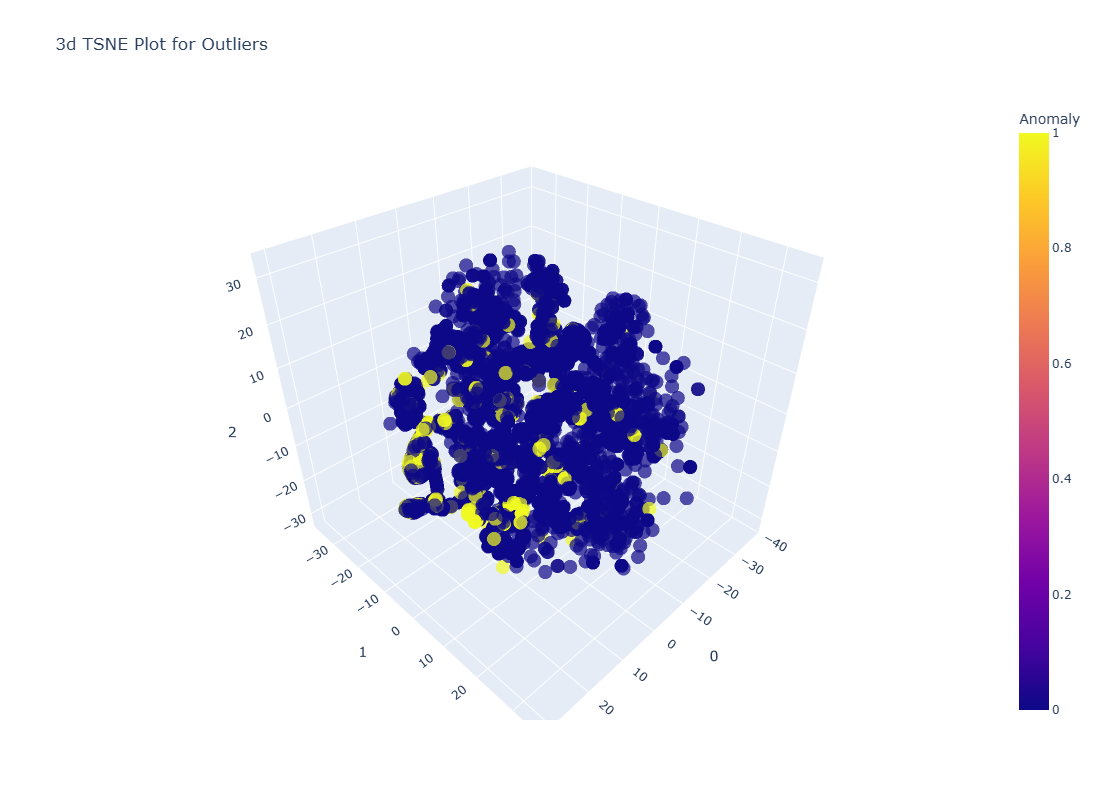

In [99]:
# [STEP 5] Analyze Model (Plot Diagnostics)
print("\n[STEP 5] Analyzing Model: Plotting t-SNE projection of anomalies...")
# t-SNE helps visualize the outliers separated from the main cluster
exp.plot_model(iforest, plot='tsne')


In [101]:
# [STEP 6] Assign Anomaly Labels
print("\n[STEP 6] Assigning Anomaly Labels and Scores to the original data...")
# Adds two new columns: 'Anomaly' (1 or 0) and 'Anomaly_Score'
data_with_anomalies = exp.assign_model(iforest)

print("Data with Anomaly Labels (first 5 rows):")
print(data_with_anomalies[['Anomaly', 'Anomaly_Score']].head())
print("\nTotal anomalies found:", data_with_anomalies['Anomaly'].sum())



[STEP 6] Assigning Anomaly Labels and Scores to the original data...
Data with Anomaly Labels (first 5 rows):
   Anomaly  Anomaly_Score
0        0      -0.006017
1        0      -0.002320
2        1       0.001151
3        0      -0.003480
4        0      -0.001540

Total anomalies found: 340


In [103]:
# [STEP 7] Save Model (MLOps Readiness)
print("\n[STEP 7] Saving anomaly detector and preprocessing pipeline...")
exp.save_model(iforest, 'anomaly_kiva_pipeline')

print("\nPipeline saved successfully!")


[STEP 7] Saving anomaly detector and preprocessing pipeline...
Transformation Pipeline and Model Successfully Saved

Pipeline saved successfully!
